In [32]:
from sklearn import datasets
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


def kume_merkezlerini_yeniden_hesapla(refler, noktalar, kumeler):
    for k in range(refler.shape[0]):
        refler[k] = noktalar[kumeler==k].mean(axis=0)

    return refler

def noktalari_kumelere_ata(noktalar, merkezler):
    c=((noktalar[:, None, :] - merkezler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    return c

def noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, merkezler, kumeler):
    wcs = 0
    for k in range(merkezler.shape[0]):
        wcs += ((noktalar[kumeler==k] - merkezler[k])**2).sum()
    return wcs

@interact(iters=(0,40,1), seed=(0,100,1), kmeans=(2,10,1), dseed=(0,100,1))
def kviz(iters=0, seed=0, kmeans=5, dseed=40):
    wcss = []
    X, bilmiyoruz = datasets.make_blobs(random_state=dseed, centers=kmeans, n_samples=200)
    np.random.seed(seed)
    inds = list(range(X.shape[0]))
    noks = np.random.choice(inds, size=kmeans, replace=False)
    noktalar = X
    refler = noktalar[noks]
    c=((noktalar[:, None, :] - refler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    plt.figure(figsize=(12, 8))
    plt.title("t=0: Cluster centers are randomly assigned")

    for _ in range(iters):
        if _ % 2 == 0:
            plt.title(f"t={_+1}: Step: Maximization (Cluster centers re-calculated)")
            refler = kume_merkezlerini_yeniden_hesapla(refler, noktalar, c)
        else:
            plt.title(f"t={_+1}: Step: Expectation (Samples re-assigned to clusters)")
            c = noktalari_kumelere_ata(noktalar, refler)
        wcs = noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, refler, c)
        wcss.append(wcs)
    plt.scatter(*noktalar.T, c=c, cmap='rainbow')
    plt.scatter(*refler.T, s=400, edgecolors='k', marker='*', c=range(kmeans), cmap='rainbow')
    plt.grid()
    plt.figure(figsize=(12, 4))
    plt.plot(range(iters), wcss, marker='o')
    plt.title("Sum of squared distances to cluster centers")
    plt.grid()
    plt.xlabel("Iterations")
    plt.ylabel("WCSS")

interactive(children=(IntSlider(value=0, description='iters', max=40), IntSlider(value=0, description='seed'),…

In [33]:
#seed=48 dseed=40 istenilen bir durum oluşmadı

In [34]:
from sklearn import datasets

In [62]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=7, center_box=(-100.0, 100.0))

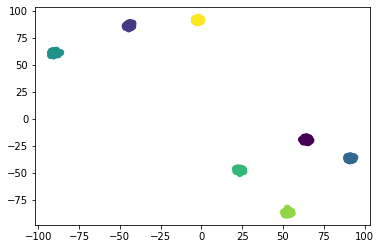

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [64]:
from sklearn.cluster import KMeans

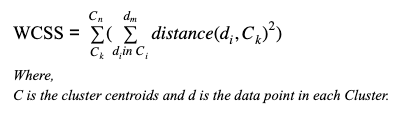

In [65]:
WCSS = []
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(X)
    WCSS.append(model.inertia_) 
    

In [66]:
WCSS

[7926204.504964945,
 1313419.1993086792,
 814989.7798314842,
 371967.3181435947,
 202154.95121098738,
 74575.66876981118,
 2039.6851403148698,
 1932.506685622487,
 1836.1106439538157,
 1740.2838820168126,
 1648.2337889441478,
 1545.6039196062834,
 1448.0220553319407,
 1389.0237346805984]

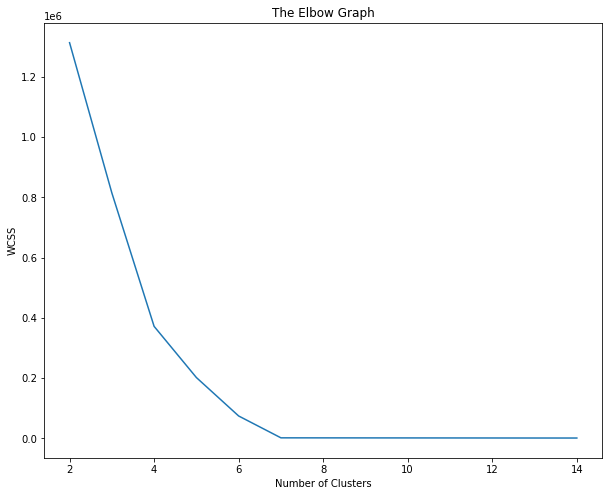

In [67]:
plt.figure(figsize=(10,8))
plt.plot(range(2,15), WCSS[1:])
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [68]:
import scipy.stats as scs

In [69]:
d1 = scs.norm([0, 0], [5, 5])

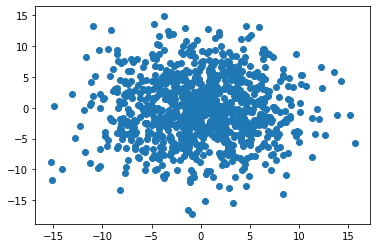

In [79]:
k1 = d1.rvs((1000,2))
plt.scatter(*d1.rvs((1000,2)).T)

In [74]:
d2 = scs.norm([15,-10], [1, 1])

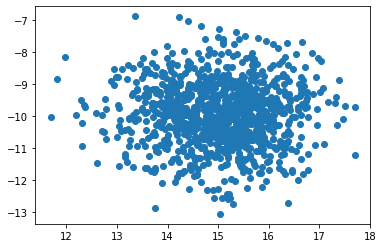

In [76]:
k2 = d2.rvs((1000,2))
plt.scatter(*d2.rvs((1000,2)).T)

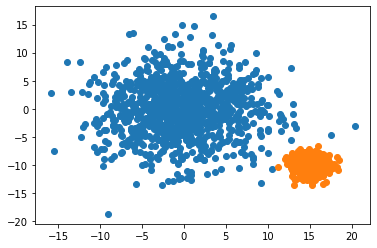

In [77]:
plt.scatter(*d1.rvs((1000,2)).T)
plt.scatter(*d2.rvs((1000,2)).T)

In [80]:
data = np.concatenate([k1, k2], axis=0)
data

array([[ -7.0499241 ,   3.05687296],
       [ -4.31932636,  -3.40596027],
       [ -0.86142943,   0.44489503],
       ...,
       [ 13.98570315, -10.43257408],
       [ 15.29297537,  -9.9599708 ],
       [ 14.5500259 , -10.45270983]])

In [81]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

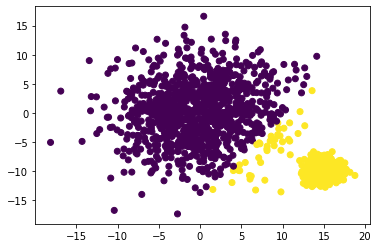

In [82]:
plt.scatter(*data.T, c=kmeans.predict(data))

In [83]:
# kümelerin eşit std sapmaya sahip olduğunu varsayıyor. 

In [88]:
data1, y = datasets.make_moons(n_samples=1000, noise=0.1)

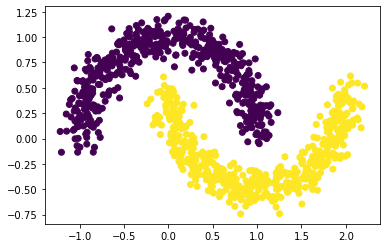

In [89]:
plt.scatter(*data1.T, c=y)

In [90]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)

KMeans(n_clusters=2)

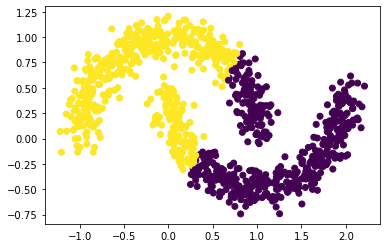

In [91]:
plt.scatter(*data1.T, c=kmeans.predict(data1))

In [92]:
# yine aynı varsayımda bulundu. std sapmaları eşit kabul etti. Bu durumlarda Kmeans başarısız oluyor.

In [93]:
WCSS = []
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(data1)
    WCSS.append(model.inertia_) 

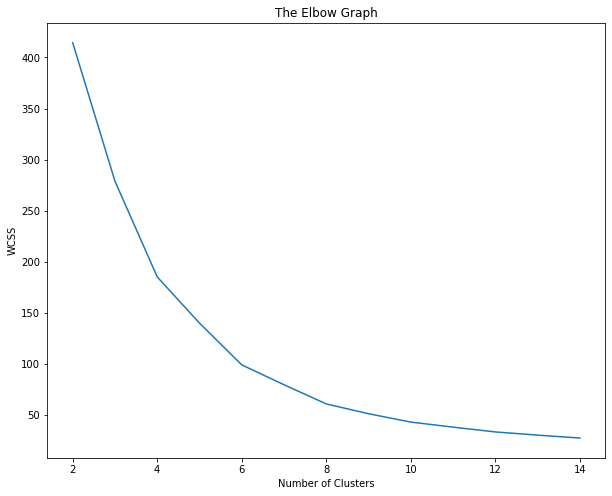

In [94]:
plt.figure(figsize=(10,8))
plt.plot(range(2,15), WCSS[1:])
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()